# Depression Classifier
Attempts to determine if a given text displays signs of depression using [data from Reddit](https://www.kaggle.com/datasets/infamouscoder/depression-reddit-cleaned). Designed for PCYC.

Overall, this dataset appears pretty poorly made because there is a significant imbalance in the amount of text per row. Most categories labeled "depression" have entire paragraphs - the other ones are basic sentences (of which I assume are encouraging responses rather than entire posts). I would suggest crawling through polar opposite posts in completely different threads (ie: r/success or r/happy) to capture a better dataset.

## 1. Import Libraries

In [71]:
import pandas as pd
import numpy as np

## 2. Import Dataset

In [72]:
ds = pd.read_csv("./datasets/depression_dataset_reddit_cleaned.csv")
X = ds["clean_text"].values
y = ds["is_depression"].values

In [73]:
ds.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


### 2.1 Preprocess Inputs

In [74]:
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk
import re

ss = SnowballStemmer(language="english")
english_words = set(stopwords.words())

def preprocess(text):
    text = re.sub(r"^[a-z]", "", text.lower()).split()
    text = [ss.stem(word) for word in text if word not in english_words]
    text = " ".join(text)

    return text

In [75]:
X = [preprocess(text) for text in X]

### 2.2 Split Dataset

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.3 Vectorize Words

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1500)
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

## 3. Create Model

In [78]:
from sklearn.svm import SVC

classifier = SVC(kernel="rbf", random_state=42)
classifier.fit(X_train, y_train)

SVC(random_state=42)

### 3.1 Evaluate Performance

In [79]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)
print(f"accuracy score = {accuracy_score(y_test, y_pred):.2f}")

accuracy score = 0.95


<AxesSubplot:>

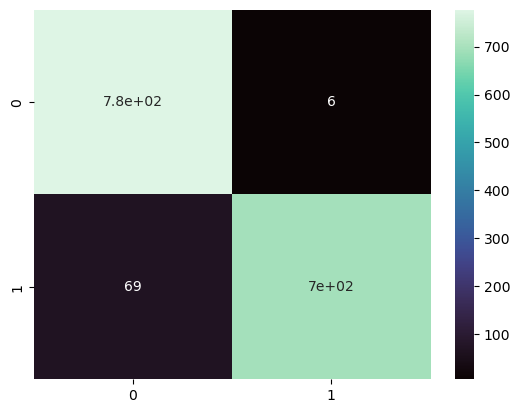

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="mako")

### 3.2 Make a Prediction

In [81]:
def predict(text):
    text =  cv.transform([preprocess(text)]).toarray()
    return classifier.predict(text)

In [82]:
predict("I'm worthless. This is the conclusion I've come to. I have nothing to offer to the world, and the world has nothing to offer me. My love/sexual life is almost non existent, nobody else other than my shitty current job will hire me, I'm an introverted person that can barely keep up with friends, and my family hardly ever talks to me. I honestly feel like I'm not even welcome in this world, because my flaws will always be scrutinized and my accomplishments will always get overlooked. I honestly don't even know why I'm here because if I can't gain anything good in life, and if I have nothing good to offer, then what the fuck am I even doing here? Why should I continue the suffering? To pass the time? All I wanna do is do nothing other than drink and smoke weed on my spare time. And the worst part of it is that nobody is willing to listen to me, and for those that have listened can't do anything to help me. I know that this post won't get any comments but it be nice if my life wasn't so shit and that I had somebody to talk to.")

array([1], dtype=int64)

In [83]:
predict("My dog died today This afternoon I got a call from my mom, telling me the vet was not happy with my dog. My mom said she was going to see Cassie (my dog) but she may have to put her down. I told her to put Cassie down if she was suffering. My little girl was so special... She tried so hard to protect us and she was so sweet. She would play with bottles and only eat when someone was with her. She had such silky fur and floppy ears. Cassie would always smell everything. Shame she was so overprotective and loving even with my other two dogs. She was also a hunter - killing birds and other small animals. I am going to miss her so much and those cute eyes. She was my little girl... Been dealing with so much else and now this wtf? Also, why does it have to be while I am away? The fucking day before my family comes to visit me. Fuck this shit.")

array([1], dtype=int64)